## Movie Genre Classification
#### Problem statement
Develop machine learning model to automatically classify the movie genres based on textual descriptions.

#### Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

#visualizing datas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk #   Natural Language Toolkit for text processing
nltk.download('stopwords') # download stopwords list from NLTK
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Loading training dataset
file_path ='/content/train_data.txt'
train_data = pd.read_csv(file_path, sep=':::', header= None, names = ['ID','Title','Genre', 'Description'],engine = 'python')

#Loading testing dataset
test_path ='/content/test_data.txt'
test_data = pd.read_csv(test_path, sep=':::', header= None, names = ['ID','Title', 'Description'],engine = 'python')


In [ ]:
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
train_data['Description'].isnull().sum()

0

#### EDA (Exploratory Data Analysis)




1.   Data cleaning
2.  Data Visualization
3. Feature Engineering



In [ ]:
# Replacing missing value with an empty string
train_data['Description'].fillna('', inplace = True)
train_data['Description'].isnull().sum()

0

In [ ]:
test_data['Description'].fillna('', inplace = True)
test_data['Description'].isnull().sum()

0

Text(0, 0.5, 'Genre')

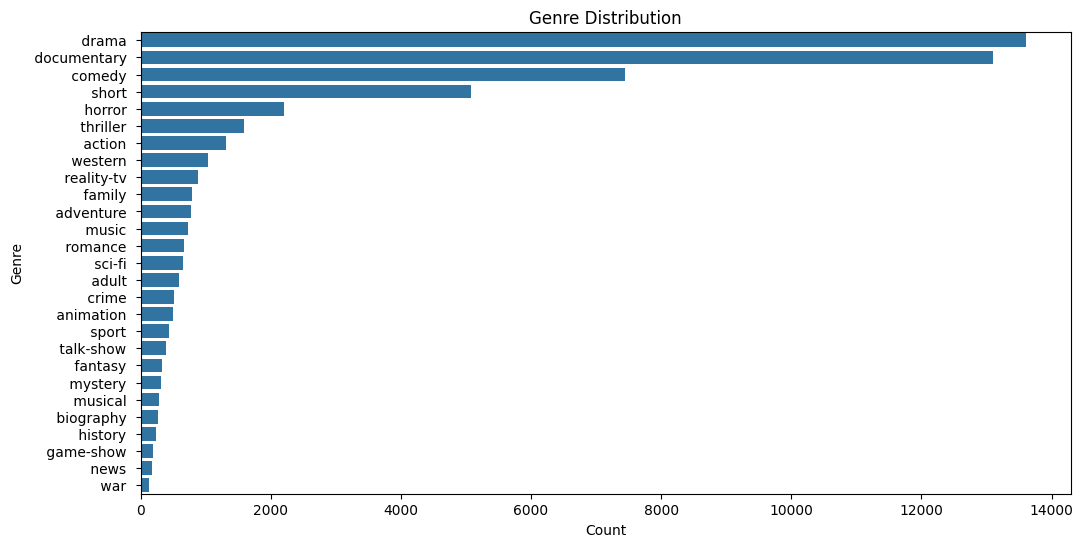

In [ ]:
#calculating genre frequencies and creating and ordered list
genre_counts = train_data['Genre'].value_counts()
ord = genre_counts.index.tolist()

#distribution of genres
plt.figure(figsize =(12, 6))
sns.countplot(train_data['Genre'], order = ord)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
# plt.xticks(rotation=45, ha='right')

In [ ]:
# Load and preprocess text data

def preprocess_text(text):
  text = text.lower() # convert text to lowercase

  # Removing special characters and digits using regular expressions

  text = re.sub(r'\d+', '', text)# remoove the digits
  text = re.sub(r'[^\w\s]', '', text) # remove special characters except whitespaces

  # Tokenize the text

  tokens = nltk.word_tokenize(text)

  return tokens

In [ ]:
# Removing stopwords
def remove_stopwords(words):
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]

  return filtered_words

In [ ]:
# Stemming and Lemmatization

def lemmatization_(words):
  lemmatizer = nltk.WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return lemmatized_words

In [ ]:
# Combining all the steps

def clean_text(text):
  words = preprocess_text(text)
  filtered_words = remove_stopwords(words)
  lemmatized_words = lemmatization_(filtered_words)
  clean_text = ' '.join(lemmatized_words)
  return clean_text

In [ ]:
# Applying the clean_text function to training and testing data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

### Text Vectorization using TF-IDF

In [ ]:
# Initializing the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# for training data
X_train = vectorizer.fit_transform(train_data['Text_cleaning'])

# for testing data
X_test = vectorizer.transform(test_data['Text_cleaning'])


### Splitting Training and testing data and Training the model





In [ ]:
X = X_train
Y = train_data['Genre']

In [ ]:
# Encoding the string labels of Y to numeric labels using label encoder

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded)
Y_train, Y_test = train_test_split(Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded)


In [ ]:
# checking the shapes of array before and after the split
print("Before split :", X.shape, Y_encoded.shape)
print("After split :", X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Before split : (54214, 136188) (54214,)
After split : (43371, 136188) (43371,) (10843, 136188) (10843,)


In [ ]:
#Inilializing and training linear regression mmodel
LogReg_model = LogisticRegression(max_iter = 1000)
LogReg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#making predictions on the testing data
y_pred = LogReg_model.predict(X_test)

In [ ]:
# Evaluating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.5763165175689385

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.23      0.32       263
           1       0.76      0.25      0.37       118
           2       0.70      0.10      0.18       155
           3       0.67      0.04      0.08       100
           4       0.00      0.00      0.00        53
           5       0.52      0.57      0.54      1490
           6       0.25      0.01      0.02       101
           7       0.65      0.87      0.75      2619
           8       0.53      0.79      0.63      2723
           9       0.67      0.06      0.12       157
          10       0.00      0.00      0.00        65
          11       0.94      0.44      0.60        39
          12       0.00      0.00      0.00        49
          13       0.69      0.55      0.61       441
          14       0.72      0.35      0.47       146
          15       0.00      0.00      0.00        55
          16       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Predicting the test datas

In [ ]:
# Use the trained model to make predictions on the test data
Y_test_pred = LogReg_model.predict(X_test)
predicted_labels_test = label_encoder.inverse_transform(Y_test_pred)
test_data['Predicted_Genre'] = predicted_labels_test

# reset the index of the test data frame
test_data = test_data.reset_index()

# creating a new dataframe with predicted genres
output_data = test_data.copy()
output_data['Predicted_Genre'] = predicted_labels_test

# saving the new dataframe to a CSV file
output_data.to_csv('movie_genre_predictions.csv', index= False)



In [ ]:
print(test_data)

       level_0  index     ID  \
0            0      0      1   
1            1      1      2   
2            2      2      3   
3            3      3      4   
4            4      4      5   
...        ...    ...    ...   
10838    10838  10838  10839   
10839    10839  10839  10840   
10840    10840  10840  10841   
10841    10841  10841  10842   
10842    10842  10842  10843   

                                                   Title  \
0                                  Edgar's Lunch (1998)    
1                              La guerra de papá (1977)    
2                           Off the Beaten Track (2010)    
3                                Meu Amigo Hindu (2015)    
4                                     Er nu zhai (1955)    
...                                                  ...   
10838          Frontline Fighting: Battling ISIS (2015)    
10839                             Ana Al Magnoon (1981)    
10840   Actors' Transformation: The Work of Deena Lev...   
10841          

 **Thank you**





